# Homogeneous Model

Our goal is to get to the Conformal Model, which deals with conformal transformations. A middle step is
to deal with the Homogeneous Model. This model increments the original Euclidean space in 1 dimension,
i.e. $\mathbb R^n$ becomes $\mathbb R^{n+1}$. The extra dimension is denoted $\mathbf{e}_0$, while
the other base vectors define the actual location in space.

One motivation for the extra dimension is to be able to distinguish between points and vectors.

## 1. Points

In the Homogeneous Model, a point in $\mathbb R^3$ is given by
$$
p = \mathbf{e}_0 + \alpha_1 \mathbf{e}_1 +\alpha_2 \mathbf{e}_2 +\alpha_3 \mathbf{e}_3.
$$
Note that this point is "unitary" since the coefficient of $\mathbf e_0$ is 1. Thus
a generalization of this definition is simply

$$
 m \left(\mathbf{e}_0 + \alpha_1 \mathbf{e}_1 +\alpha_2 \mathbf{e}_2 +\alpha_3 \mathbf{e}_3\right),
$$
where $m \in \mathbb R$ is the weight.

We can obtain the geometric location of a point $p$ by
$$
\text{location:} \frac{p}{\mathbf{e}_0^{-1} \cdot p}.
$$

Note that a vector $\mathbf{p}$, i.e. a point with $0\mathbf e_0$, can be seen as an infinite point or simply as a direction.

Given two points, $p$ and $q$ we have:
$$
p + q = m_p (\mathbf e_0 + \mathbf p) + m_q (\mathbf e_0 + \mathbf q) = 
(m_p + m_q)\mathbf e_0 + m_p\mathbf p + m_q\mathbf q= 
(m_p + m_q)\left(\mathbf e_0 + \frac{m_p\mathbf p + m_q\mathbf q}{(m_p + m_q)}\right).
$$



Hence, this sum of points gives a point of weight $m_p + m_q$ at the "center of mass" of the
two points.

Note that, for a unit point $p = e_0 + \mathbf p$, by summing a direction $\mathbf t$ we simply get
a unit point $e_0 + \mathbf p + \mathbf t$, which is the same as translating the point by $\mathbf t$.

Yet, if $p$ has a weight $m$, we get
$$
p + \mathbf t = m (\mathbf e_0 + \mathbf p) + \mathbf t = m (\mathbf e_0 + \mathbf p + \mathbf t/m).
$$
Which means that we translate $p$ only by $\mathbf t/m$. Thus, to translate a point of mass $m$ by $\mathbf t$
we actually need to sum it by $ m \mathbf t$.

## 2. Lines

Lines can be computed simply by the outer product of two points, e.g. $l = p\wedge q$. We can
show that this indeed satisfy the property that $x \wedge l = 0$ for every point $x$ that "should"
be over this line. An equivalent construction is by providing a point $p$ and a direction $\mathbf a$,
such that $l = p \wedge \mathbf a$.

Note if $\mathbf a = \mathbf q - \mathbf p$, then
$$
p \wedge q = p \wedge q - p\wedge p = p \wedge (q - p) = p \wedge (\mathbf e_0 + \mathbf q - \mathbf e_0 - \mathbf p)
= p \wedge (\mathbf q - \mathbf p)
= p \wedge \mathbf a.
$$

From a line $l = p \wedge q$, we cannot recover $p$ and $q$. Hence, if we wish to model a line segment,
we need to store the both $p\wedge q$ and $p,q$. Or at least $p$ and $p \wedge q$, as we can compute
$q$ using:

$$
q = p \mathbf e_0^{-1} \rfloor (p\wedge q).
$$


Another interesting point is that a line $l = p\wedge q$ is equal to $\mathbf e_0 (\mathbf q - \mathbf p) + \mathbf p \wedge \mathbf q$.
We can obtain these values by noting that $\mathbf e_0$ times a vector will return a blades of grade
$\mathbf e_0 \wedge \mathbf e_i$ where $i \in \{1,2,3\}$. Hence, grab all the blades with this formulation
which will give $(\mathbf q - \mathbf p)\wedge \mathbf e_0$. To remove the $\mathbf e_0$, do

$$
(\mathbf q - \mathbf p)\wedge \mathbf e_0 \cdot \mathbf e_0 = \mathbf q - \mathbf p = \mathbf a.
$$

Another more "algebraic" way of getting $\mathbf a$ is by doing:
$$
\mathbf a = \mathbf e_{0}^{-1} \rfloor l \\
\mathbf M = \mathbf e_{0}^{-1} \rfloor (\mathbf e_0 \wedge l).
$$

Using this formula for the line, we can compute the support vector of a line, i.e. the vector $\mathbf d$
perpendicular to the line $l$ that passes through the origin.

$$
\text{support vector: } \mathbf{d} = \frac{\mathbf p \wedge \mathbf q}{\mathbf q - \mathbf p} = \frac{\mathbf M}{\mathbf a}.
$$


## 3. Planes and Flats

The construction of a plane is similar to a line, just do $p \wedge q \wedge r$
for three points. We can construct more of such flat objects (such as a volume)
by using the outer product on four points and so on.

Note that a plane can also be written as $p \wedge \mathbf A$, where $\mathbf A = (\mathbf q - \mathbf p) \wedge (\mathbf r - \mathbf p)$.

We can extend the previous formulas of how to extract properties from a given flat $X = p \wedge \mathbf A$:

$$
\text{direction: } \mathbf A = \mathbf e_0^{-1} \rfloor X \\
\text{moment: } \mathbf M = \mathbf e_0^{-1} \rfloor (\mathbf e_0 \wedge X) \\
\text{support vector: } \mathbf d = \frac{\mathbf M}{\mathbf A} \\
\text{unit support point: } d = \frac{X}{\mathbf A}.
$$

With the unit support point, we can write the flat as $X = d \mathbf A$.

In [99]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

using Plots
include("./auxiliary.jl")
plotly();

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`


### Defining Points

In [100]:
cl = CliffordAlgebra(4)
e0 = cl.e4

point(x,y,z) = e0 + x*cl.e1 + y*cl.e2 + z*cl.e3

p = point(1,1,1)

p/(inv(e0) ⋅ p) - e0

+1.0×e1+1.0×e2+1.0×e3 ∈ Cl(4, 0, 0)

## Lines

Let's define a line.

In [162]:
p = point(0.5,0.5,1)
q = point(1,0,1)
l = p ∧ q;

Note that we can compute $q$ from $l$ if we know $p$. 

In [163]:
p + inv(e0)⨼(p∧q) ≈ q

true

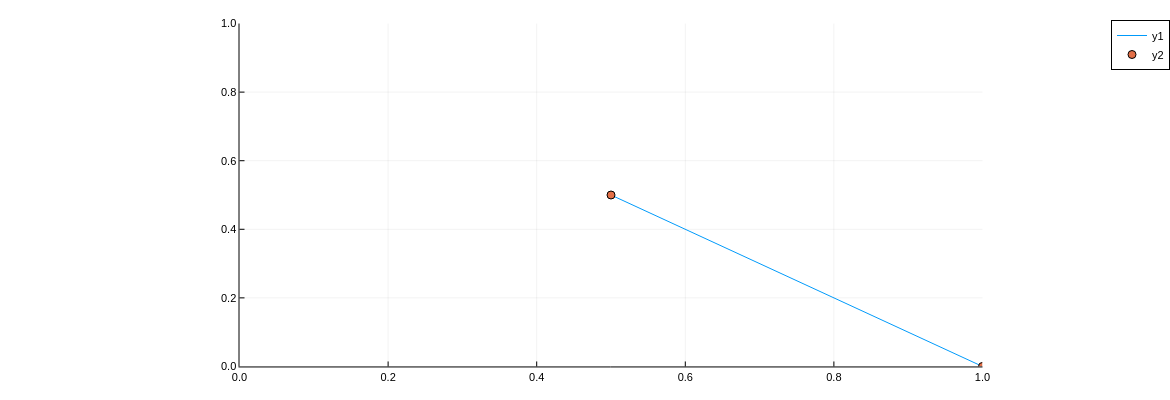

In [164]:
plot([p.e1,q.e1],[p.e2,q.e2])
scatter!([p.e1,q.e1],[p.e2,q.e2], xlims=(0,1),ylims=(0,1), aspect_ratio=1)

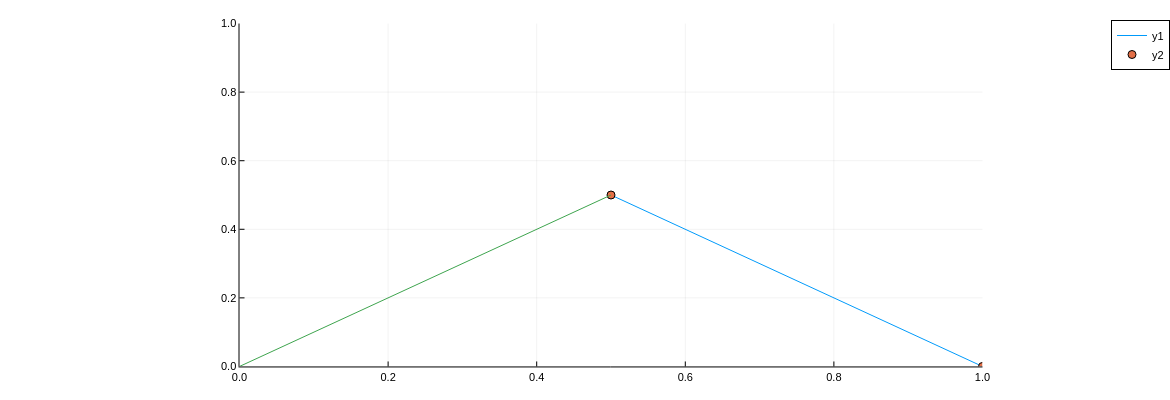

In [167]:
a = inv(e0) ⨼ l
M = inv(e0) ⨼ (e0 ∧ l)
d = M/a

plot([p.e1,q.e1],[p.e2,q.e2])
scatter!([p.e1,q.e1],[p.e2,q.e2], xlims=(0,1),ylims=(0,1), aspect_ratio=1)
quiver!([0],[0], quiver=([d.e1],[d.e2]))

Next, let's define a line using the ray formulation, i.e. given
a starting point and a direction.

In [154]:
p = point(0,0.5,0)
a  = cl.e1 + cl.e2
l = p ∧ a

# Note that x is in l since the outer product is 0
x = point(0.5,1.0,0)
x ∧ l

0

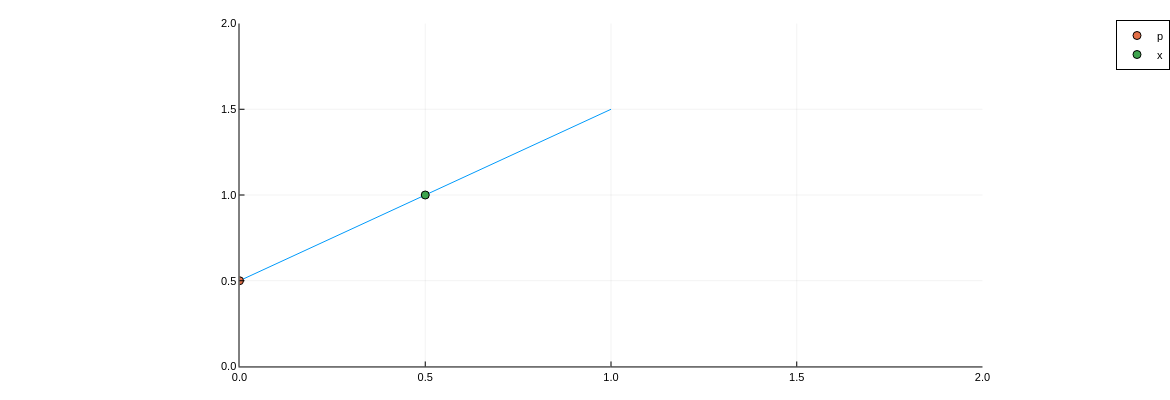

In [155]:
quiver([p.e1],[p.e2],quiver=([a.e1],[a.e2]))
scatter!([p.e1],[p.e2], xlims=(0,2),ylims=(0,2),aspect_ratio=1,label="p")
scatter!([x.e1],[x.e2], xlims=(0,2),ylims=(0,2),aspect_ratio=1,label="x")